In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['vgsales.csv']


In [24]:
games = pd.read_csv("../input/vgsales.csv")
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [25]:
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [26]:
games.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


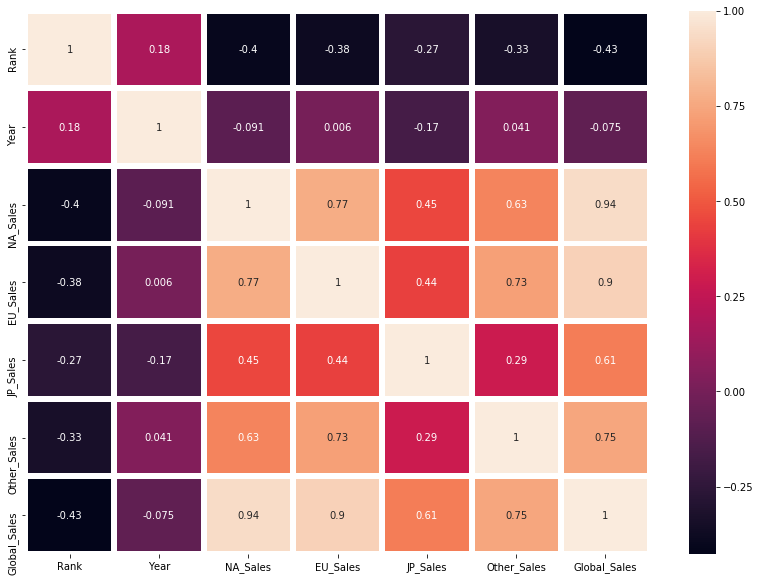

In [27]:
fig = plt.figure(figsize = (14,10))
sns.heatmap(games.corr(),linewidths = 5,annot = True)
plt.show()

In [28]:
games[(games["NA_Sales"].max() == games["NA_Sales"])]#We found game that make maximum sales in NA

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [29]:
games[games["EU_Sales"].max() == games["EU_Sales"]]#We found game that make maximum sales in EU

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [30]:
games[games["JP_Sales"].max() == games["JP_Sales"]]#We found game that make maximum sales in JP

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


In [31]:
games[games["Other_Sales"].max() == games["Other_Sales"]]#We found game that make maximum sales in other regions

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.4,0.41,10.57,20.81


In [32]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [33]:
games.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [34]:
games["Platform"].unique()#We found name of game platforms

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [35]:
# Rank of game platforms according to global sales
array = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]
games.groupby("Platform").sum().sort_values("Global_Sales",ascending = False)[array]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,583.84,339.29,139.20,193.44,1255.64
X360,601.05,280.58,12.43,85.54,979.96
PS3,392.26,343.71,79.99,141.93,957.84
Wii,507.71,268.38,69.35,80.61,926.71
DS,390.71,194.65,175.57,60.53,822.49
PS,336.51,213.60,139.82,40.91,730.66
GBA,187.54,75.25,47.33,7.73,318.50
PSP,108.99,68.25,76.79,42.19,296.28
PS4,96.80,123.70,14.30,43.36,278.10


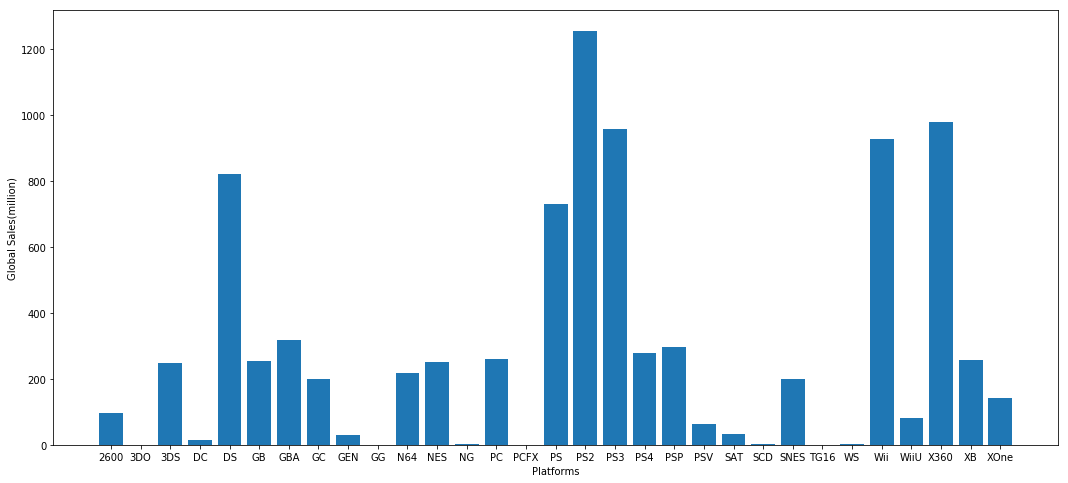

In [36]:
#We can draw the bar graph game platforms according to global sales
group = games.groupby("Platform").sum()["Global_Sales"]
fig,axis = plt.subplots(figsize = (18,8))
axis.bar(group.keys(),list(group))
axis.set_xlabel("Platforms")
axis.set_ylabel("Global Sales(million)")
plt.show()

In [37]:
games["Publisher"].nunique()

578

In [38]:
# Top 5 Publishers from global sales
group = games.groupby("Publisher")
group.sum().sort_values("Global_Sales",ascending = False)[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,816.87,418.74,455.42,95.33,1786.56
Electronic Arts,595.07,371.27,14.04,129.77,1110.32
Activision,429.70,215.53,6.54,75.34,727.46
Sony Computer Entertainment,265.22,187.72,74.10,80.45,607.50
Ubisoft,253.43,163.32,7.50,50.26,474.72


In [39]:
# 5 Publishers that make the least sales global
group.sum().sort_values("Global_Sales",ascending = False)[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].tail()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Ongakukan,0.0,0.0,0.01,0.0,0.01
Commseed,0.0,0.0,0.01,0.0,0.01
Takuyo,0.0,0.0,0.01,0.0,0.01
Boost On,0.0,0.0,0.01,0.0,0.01
Naxat Soft,0.0,0.0,0.01,0.0,0.01


In [40]:
games["Genre"].unique()# We can see different game types

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [41]:
# We can see game types sales region to region
group = games.groupby("Genre")
group.sum().sort_values("Global_Sales",ascending = False)[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,877.83,525.00,159.95,187.38,1751.18
Sports,683.35,376.85,135.37,134.97,1330.93
Shooter,582.60,313.27,38.28,102.69,1037.37
Role-Playing,327.28,188.06,352.31,59.61,927.37
Platform,447.05,201.63,130.77,51.59,831.37
Misc,410.24,215.98,107.76,75.32,809.96
Racing,359.42,238.39,56.69,77.27,732.04
Fighting,223.59,101.32,87.35,36.68,448.91
Simulation,183.31,113.38,63.70,31.52,392.20


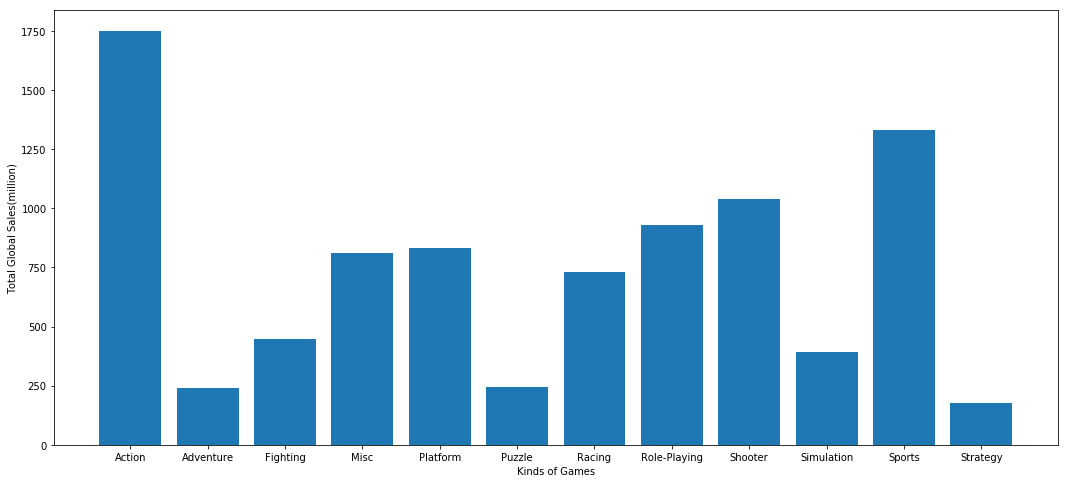

In [42]:
# We can draw the bar graph game types according to global sales
fig,axis = plt.subplots(figsize = (18,8))
group = group.sum()["Global_Sales"]
axis.bar(group.keys(),list(group))
axis.set_xlabel("Kinds of Games")
axis.set_ylabel("Total Global Sales(million)")
plt.show()